### draft week1: Try to build the basic data frames, extract information and perform primary feature engineering
#### are there other variables to consider: e.g. best player? Referees? The 20 over scores for each team in each game?

In [982]:
import pandas as pd
print(pd.__version__)

1.4.2


# Step 1: read and extract information from a csv sample file

In [649]:
#try to read singel csv file
filepath = '/Users/quinne/Desktop/hnd_csv2/1252673_info.csv'
df = pd.read_csv(filepath, sep=',', names=['Type', 'Key', 'Value'], header=None, nrows=21)
#The first 21 rows have only 3 columns, from row 22 onwards there are 4 columns and even 5 columns later on

df

,Type,Key,Value
0,version,2.2.0,NaN
1,info,balls_per_over,5
2,info,team,Welsh Fire
3,info,team,Southern Brave
4,info,gender,male
5,info,season,2021
6,info,date,2021/07/27
7,info,event,The Hundred Men's Competition
8,info,match_number,8
9,info,venue,"Sophia Gardens, Cardiff"


In [650]:
#solution1: No forward-looking
filepath = '/Users/quinne/Desktop/hnd_csv2/1252673_info.csv'
df = pd.read_csv(filepath, sep=',', names=['Type', 'Key', 'Value'], header=None, nrows=21)

result_df = pd.DataFrame(columns=['Result', 'team', 'Opponent', 'gender', 'season', 'date', 
                                  'match_number', 'venue', 'city', 'toss_winner', 'toss_decision', 'winner'])


team = df[df['Key'] == 'team']['Value'].values
opponent = df[df['Key'] == 'team']['Value'].values[::-1]
gender = df[df['Key'] == 'gender']['Value'].values[0]
season = df[df['Key'] == 'season']['Value'].values[0]
date = df[df['Key'] == 'date']['Value'].values[0]
match_number = df[df['Key'] == 'match_number']['Value'].values[0]
venue = df[df['Key'] == 'venue']['Value'].values[0]
city = df[df['Key'] == 'city']['Value'].values[0]
toss_winner = df[df['Key'] == 'toss_winner']['Value'].values[0]
toss_decision = df[df['Key'] == 'toss_decision']['Value'].values[0]
winner = df[df['Key'] == 'winner']['Value'].values[0]


for i in range(2):
    if team[i] == winner:
        result = 'win'
    else:
        result = 'loose'
    result_df = result_df.append({'Result': result, 'team': team[i], 'Opponent': opponent[i], 
                                  'gender': gender, 'season': season, 'date': date, 'match_number': match_number, 
                                  'venue': venue, 'city': city, 'toss_winner': toss_winner, 
                                  'toss_decision': toss_decision, 'winner': winner}, ignore_index=True)

result_df

,Result,team,Opponent,gender,season,date,match_number,venue,city,toss_winner,toss_decision,winner
0,win,Welsh Fire,Southern Brave,male,2021,2021/07/27,8,"Sophia Gardens, Cardiff",Cardiff,Southern Brave,field,Welsh Fire
1,loose,Southern Brave,Welsh Fire,male,2021,2021/07/27,8,"Sophia Gardens, Cardiff",Cardiff,Southern Brave,field,Welsh Fire


In [651]:
#solution2: future method!
#Keep two rows of data for each game, first row for winning team, second row for losing team

filepath = '/Users/quinne/Desktop/hnd_csv2/1252673_info.csv'
df = pd.read_csv(filepath, sep=',', names=['Type', 'Key', 'Value'], header=None, nrows=21)

result_df = pd.DataFrame(columns=['Result', 'team', 'Opponent', 'gender', 'season', 
                                  'date', 'match_number', 'venue', 'city', 'toss_winner', 
                                  'toss_decision', 'winner'])


teams = df[df['Key'] == 'team']['Value'].values
gender = df[df['Key'] == 'gender']['Value'].values[0]
season = df[df['Key'] == 'season']['Value'].values[0]
date = df[df['Key'] == 'date']['Value'].values[0]
match_number = df[df['Key'] == 'match_number']['Value'].values[0]
venue = df[df['Key'] == 'venue']['Value'].values[0]
city = df[df['Key'] == 'city']['Value'].values[0]
toss_winner = df[df['Key'] == 'toss_winner']['Value'].values[0]
toss_decision = df[df['Key'] == 'toss_decision']['Value'].values[0]
winner = df[df['Key'] == 'winner']['Value'].values[0]


winner_team = winner
loser_team = [team for team in teams if team != winner_team][0]


result_df = result_df.append({'Result': 'win', 'team': winner_team, 'Opponent': loser_team, 
                              'gender': gender, 'season': season, 'date': date, 'match_number': match_number, 
                              'venue': venue, 'city': city, 'toss_winner': toss_winner, 
                              'toss_decision': toss_decision, 'winner': winner}, ignore_index=True)
result_df = result_df.append({'Result': 'loose', 'team': loser_team, 'Opponent': winner_team, 
                              'gender': gender, 'season': season, 'date': date, 'match_number': match_number, 
                              'venue': venue, 'city': city, 'toss_winner': toss_winner, 
                              'toss_decision': toss_decision, 'winner': winner}, ignore_index=True)

result_df 
# single csv read to create two rows no problem

,Result,team,Opponent,gender,season,date,match_number,venue,city,toss_winner,toss_decision,winner
0,win,Welsh Fire,Southern Brave,male,2021,2021/07/27,8,"Sophia Gardens, Cardiff",Cardiff,Southern Brave,field,Welsh Fire
1,loose,Southern Brave,Welsh Fire,male,2021,2021/07/27,8,"Sophia Gardens, Cardiff",Cardiff,Southern Brave,field,Welsh Fire


# Step 2: Traversing and reading 124 mathces to create a data frame

The following is a traversal of the 124 matches in the folder 
(with the _info suffix) to extract information and create a data frame

Two rows of information are extracted for one match, 124 matches in total
so the extracted data frame should be 248 rows and 12 columns

The difficulty lies in ‘match_number’ and ‘winner’

A total of 8 matches were found to have no match number and only one match had no winner 
Let's try to figure out why this is unusual

(after checking the news, the match was interrupted by rain on the day)

news link: https://www.espncricinfo.com/series/the-hundred-men-s-competition-2021-1252040/manchester-originals-men-vs-southern-brave-men-19th-match-1252684/full-scorecard

In [900]:
import os
import warnings
warnings.filterwarnings('ignore')

result_df = pd.DataFrame(columns=['Result', 'team', 'Opponent', 'gender', 'season', 
                            'date', 'match_number', 'venue', 'city', 'toss_winner', 
                            'toss_decision', 'winner'])

directory = '/Users/quinne/Desktop/hnd_csv2/'
for filename in os.listdir(directory):
    if filename.endswith('_info.csv'):  
        filepath = os.path.join(directory, filename)
        try:
            df = pd.read_csv(filepath, sep=',', names=['Type', 'Key', 'Value', 'Other1', 'Other2'], header=None)

            teams = df[df['Key'] == 'team']['Value'].values
            gender = df[df['Key'] == 'gender']['Value'].values[0]
            season = df[df['Key'] == 'season']['Value'].values[0]
            date = df[df['Key'] == 'date']['Value'].values[0]
            
            
            #set no match number to 'Unknow'
            match_number = df[df['Key'] == 'match_number']['Value'].values[0] if df[df['Key'] == 'match_number']['Value'].values.size > 0 else 'Unknown'
            
            
            venue = df[df['Key'] == 'venue']['Value'].values[0]
            city = df[df['Key'] == 'city']['Value'].values[0]
            toss_winner = df[df['Key'] == 'toss_winner']['Value'].values[0]
            toss_decision = df[df['Key'] == 'toss_decision']['Value'].values[0]
            
            
            #set no winner to 'No winner' if there is no variable on that line
            winner = df[df['Key'] == 'winner']['Value'].values[0] if df[df['Key'] == 'winner']['Value'].values.size > 0 else 'No winner'
        
        
            winner_team = winner
            loser_team = [team for team in teams if team != winner_team][0]

            result_df = result_df.append({'Result': 'win', 'team': winner_team, 'Opponent': loser_team, 'gender': gender, 'season': season, 'date': date, 'match_number': match_number, 'venue': venue, 'city': city, 'toss_winner': toss_winner, 'toss_decision': toss_decision, 'winner': winner}, ignore_index=True)
            result_df = result_df.append({'Result': 'loose', 'team': loser_team, 'Opponent': winner_team, 'gender': gender, 'season': season, 'date': date, 'match_number': match_number, 'venue': venue, 'city': city, 'toss_winner': toss_winner, 'toss_decision': toss_decision, 'winner': winner}, ignore_index=True)
   
        except Exception as e:
            print(f'Error with file {filename}: {str(e)}')

print(result_df)

    Result                    team                Opponent  gender season  \
0      win      Birmingham Phoenix           London Spirit    male   2022   
1    loose           London Spirit      Birmingham Phoenix    male   2022   
2      win  Northern Superchargers          Southern Brave    male   2022   
3    loose          Southern Brave  Northern Superchargers    male   2022   
4      win  Northern Superchargers              Welsh Fire  female   2021   
..     ...                     ...                     ...     ...    ...   
243  loose    Manchester Originals              Welsh Fire  female   2021   
244    win    Manchester Originals      Birmingham Phoenix    male   2022   
245  loose      Birmingham Phoenix    Manchester Originals    male   2022   
246    win           Trent Rockets              Welsh Fire    male   2022   
247  loose              Welsh Fire           Trent Rockets    male   2022   

           date match_number                     venue        city  \
0    

In [901]:
# convert 'date' to datetime object
result_df['date'] = pd.to_datetime(result_df['date'])

# sort by 'season' and 'date'
result_df = result_df.sort_values(by=['season', 'date'])

# create 'month' and 'day' columns
result_df['month'] = result_df['date'].dt.month
result_df['day'] = result_df['date'].dt.day

# drop 'date' column
result_df = result_df.drop(['date'], axis=1)

# re-arrange the columns
column_order = ['Result', 'team', 'Opponent', 'gender', 'season', 'month', 'day', 'match_number', 
                'venue', 'city', 'toss_winner', 'toss_decision', 'winner']
result_df = result_df[column_order]

# reset index with drop=True to discard the old index
result_df = result_df.reset_index(drop=True)

In [902]:
result_df

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
0,win,Oval Invincibles,Manchester Originals,female,2021,7,21,1,"Kennington Oval, London",London,Manchester Originals,bat,Oval Invincibles
1,loose,Manchester Originals,Oval Invincibles,female,2021,7,21,1,"Kennington Oval, London",London,Manchester Originals,bat,Oval Invincibles
2,win,Oval Invincibles,Manchester Originals,male,2021,7,22,1,"Kennington Oval, London",London,Manchester Originals,field,Oval Invincibles
3,loose,Manchester Originals,Oval Invincibles,male,2021,7,22,1,"Kennington Oval, London",London,Manchester Originals,field,Oval Invincibles
4,win,Birmingham Phoenix,London Spirit,male,2021,7,23,2,"Edgbaston, Birmingham",Birmingham,Birmingham Phoenix,field,Birmingham Phoenix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,loose,London Spirit,Manchester Originals,male,2022,9,2,Unknown,"The Rose Bowl, Southampton",Southampton,London Spirit,bat,Manchester Originals
244,win,Oval Invincibles,Southern Brave,female,2022,9,3,Unknown,"Lord's, London",London,Southern Brave,bat,Oval Invincibles
245,loose,Southern Brave,Oval Invincibles,female,2022,9,3,Unknown,"Lord's, London",London,Southern Brave,bat,Oval Invincibles
246,win,Trent Rockets,Manchester Originals,male,2022,9,3,Unknown,"Lord's, London",London,Manchester Originals,bat,Trent Rockets


## Step3: Handling data frame exceptions

### Step 3.1 for this 'no winner' match

In [903]:
result_df[result_df.iloc[:,-1]=='No winner']  

#1 match two rows 
#2021-08-05 Southern Brave vs Manchester Originals

#checking the news, the match was interrupted by rain on the day
#should be 'no result' and 'no winer', need to change result set

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
66,win,No winner,Manchester Originals,male,2021,8,5,19,"Old Trafford, Manchester",Manchester,Southern Brave,field,No winner
67,loose,Manchester Originals,No winner,male,2021,8,5,19,"Old Trafford, Manchester",Manchester,Southern Brave,field,No winner


In [904]:
# Set 'no result' and 'no winer' for this special match

team_a ='Manchester Originals'
team_b ='Southern Brave'

result_df.loc[(result_df['winner'] == 'No winner'), 'Result'] = 'No result'

# Get the indices of the rows for match_number 19
indices = no_winner_rows.index.tolist()

# Set team A and team B for the first row
result_df.at[indices[0], 'team'] = team_a
result_df.at[indices[0], 'Opponent'] = team_b

# Set team B and team A for the second row
result_df.at[indices[1], 'team'] = team_b
result_df.at[indices[1], 'Opponent'] = team_a

In [905]:
no_winner_rows = result_df[result_df.iloc[:,-1]=='No winner']  
no_winner_rows 

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
66,No result,Manchester Originals,Southern Brave,male,2021,8,5,19,"Old Trafford, Manchester",Manchester,Southern Brave,field,No winner
67,No result,Southern Brave,Manchester Originals,male,2021,8,5,19,"Old Trafford, Manchester",Manchester,Southern Brave,field,No winner


#### 'no winner' is important? no, just a match.

#### process: simply delete these two rows (a match)

In [906]:
result_df = result_df[result_df['winner'] != 'No winner']

In [907]:
#check that: no winner
result_df['winner'].value_counts() 

Southern Brave            46
Oval Invincibles          40
Birmingham Phoenix        36
Trent Rockets             36
Northern Superchargers    26
Manchester Originals      26
London Spirit             24
Welsh Fire                12
Name: winner, dtype: int64

### Step 3.2 for matches without ‘match number’

In [908]:
matches_without_number = result_df[result_df.iloc[:,7]=='Unknown'] #8 matches 16 rows
matches_without_number

#I found that the 8 matches without a match number all had a common date

#2021-08-20, 2021-08-21
#2022-09-02, 2022-09-03

#The eight races are the knockout and final races for both men and women in each season

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
120,win,Southern Brave,Trent Rockets,male,2021,8,20,Unknown,"Kennington Oval, London",London,Southern Brave,field,Southern Brave
121,loose,Trent Rockets,Southern Brave,male,2021,8,20,Unknown,"Kennington Oval, London",London,Southern Brave,field,Southern Brave
122,win,Oval Invincibles,Birmingham Phoenix,female,2021,8,20,Unknown,"Kennington Oval, London",London,Birmingham Phoenix,field,Oval Invincibles
123,loose,Birmingham Phoenix,Oval Invincibles,female,2021,8,20,Unknown,"Kennington Oval, London",London,Birmingham Phoenix,field,Oval Invincibles
124,win,Southern Brave,Birmingham Phoenix,male,2021,8,21,Unknown,"Lord's, London",London,Birmingham Phoenix,field,Southern Brave
125,loose,Birmingham Phoenix,Southern Brave,male,2021,8,21,Unknown,"Lord's, London",London,Birmingham Phoenix,field,Southern Brave
126,win,Oval Invincibles,Southern Brave,female,2021,8,21,Unknown,"Lord's, London",London,Southern Brave,field,Oval Invincibles
127,loose,Southern Brave,Oval Invincibles,female,2021,8,21,Unknown,"Lord's, London",London,Southern Brave,field,Oval Invincibles
240,win,Southern Brave,Trent Rockets,female,2022,9,2,Unknown,"The Rose Bowl, Southampton",Southampton,Trent Rockets,field,Southern Brave
241,loose,Trent Rockets,Southern Brave,female,2022,9,2,Unknown,"The Rose Bowl, Southampton",Southampton,Trent Rockets,field,Southern Brave


In [909]:
# Exclude rows where match_number is 'Unknown'
matches_with_number = result_df[result_df['match_number'] != 'Unknown']

# Convert the match_number column to integers
matches_with_number['match_number'] = matches_with_number['match_number'].astype(int)

# Check the minimum, maximum and the distribution of match numbers
min_match_number = matches_with_number['match_number'].min()
max_match_number = matches_with_number['match_number'].max()
distribution = matches_with_number['match_number'].value_counts().sort_index()

print(f'Minimum match number: {min_match_number}')
print(f'Maximum match number: {max_match_number}')
print('Distribution of match numbers:')
print(distribution)

Minimum match number: 1
Maximum match number: 32
Distribution of match numbers:
1     8
2     8
3     8
4     8
5     6
6     8
7     8
8     8
9     4
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    6
20    8
21    8
22    6
23    8
24    8
25    6
26    6
27    6
28    6
29    6
30    6
31    6
32    6
Name: match_number, dtype: int64


#### Obviously 2021 08 20 is the semi-final, 2021 08 21 is the final, 2022 09 02 is the semi-final and 2022 09 03 is the final. You can also tell from the information on the back that because the men's and women's match numbers for 2021 are up to 32, while the women's match number for 2022 is only up to 24. So I think we should set the match number to 40 for all the semi-finals and 50 for the finals.

In [910]:
# make sure season, month and day are integers
result_df['season'] = result_df['season'].astype(int)
result_df['month'] = result_df['month'].astype(int)
result_df['day'] = result_df['day'].astype(int)

# define a function to assign match numbers
def assign_match_number(row):
    if row['season'] == 2021 and row['month'] == 8 and row['day'] == 20:
        return 40  # semi-finals
    elif row['season'] == 2021 and row['month'] == 8 and row['day'] == 21:
        return 50  # finals
    elif row['season'] == 2022 and row['month'] == 9 and row['day'] == 2:
        return 40  # semi-finals
    elif row['season'] == 2022 and row['month'] == 9 and row['day'] == 3:
        return 50  # finals
    else:
        return row['match_number']  # keep the original match number

# apply the function to the 'match_number' column
result_df['match_number'] = result_df.apply(assign_match_number, axis=1)

# show the DataFrame
print(result_df)

    Result                  team              Opponent  gender  season  month  \
0      win      Oval Invincibles  Manchester Originals  female    2021      7   
1    loose  Manchester Originals      Oval Invincibles  female    2021      7   
2      win      Oval Invincibles  Manchester Originals    male    2021      7   
3    loose  Manchester Originals      Oval Invincibles    male    2021      7   
4      win    Birmingham Phoenix         London Spirit    male    2021      7   
..     ...                   ...                   ...     ...     ...    ...   
243  loose         London Spirit  Manchester Originals    male    2022      9   
244    win      Oval Invincibles        Southern Brave  female    2022      9   
245  loose        Southern Brave      Oval Invincibles  female    2022      9   
246    win         Trent Rockets  Manchester Originals    male    2022      9   
247  loose  Manchester Originals         Trent Rockets    male    2022      9   

     day match_number      

In [911]:
result_df[result_df['match_number']==40]

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
120,win,Southern Brave,Trent Rockets,male,2021,8,20,40,"Kennington Oval, London",London,Southern Brave,field,Southern Brave
121,loose,Trent Rockets,Southern Brave,male,2021,8,20,40,"Kennington Oval, London",London,Southern Brave,field,Southern Brave
122,win,Oval Invincibles,Birmingham Phoenix,female,2021,8,20,40,"Kennington Oval, London",London,Birmingham Phoenix,field,Oval Invincibles
123,loose,Birmingham Phoenix,Oval Invincibles,female,2021,8,20,40,"Kennington Oval, London",London,Birmingham Phoenix,field,Oval Invincibles
240,win,Southern Brave,Trent Rockets,female,2022,9,2,40,"The Rose Bowl, Southampton",Southampton,Trent Rockets,field,Southern Brave
241,loose,Trent Rockets,Southern Brave,female,2022,9,2,40,"The Rose Bowl, Southampton",Southampton,Trent Rockets,field,Southern Brave
242,win,Manchester Originals,London Spirit,male,2022,9,2,40,"The Rose Bowl, Southampton",Southampton,London Spirit,bat,Manchester Originals
243,loose,London Spirit,Manchester Originals,male,2022,9,2,40,"The Rose Bowl, Southampton",Southampton,London Spirit,bat,Manchester Originals


In [912]:
result_df[result_df['match_number']==50]

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
124,win,Southern Brave,Birmingham Phoenix,male,2021,8,21,50,"Lord's, London",London,Birmingham Phoenix,field,Southern Brave
125,loose,Birmingham Phoenix,Southern Brave,male,2021,8,21,50,"Lord's, London",London,Birmingham Phoenix,field,Southern Brave
126,win,Oval Invincibles,Southern Brave,female,2021,8,21,50,"Lord's, London",London,Southern Brave,field,Oval Invincibles
127,loose,Southern Brave,Oval Invincibles,female,2021,8,21,50,"Lord's, London",London,Southern Brave,field,Oval Invincibles
244,win,Oval Invincibles,Southern Brave,female,2022,9,3,50,"Lord's, London",London,Southern Brave,bat,Oval Invincibles
245,loose,Southern Brave,Oval Invincibles,female,2022,9,3,50,"Lord's, London",London,Southern Brave,bat,Oval Invincibles
246,win,Trent Rockets,Manchester Originals,male,2022,9,3,50,"Lord's, London",London,Manchester Originals,bat,Trent Rockets
247,loose,Manchester Originals,Trent Rockets,male,2022,9,3,50,"Lord's, London",London,Manchester Originals,bat,Trent Rockets


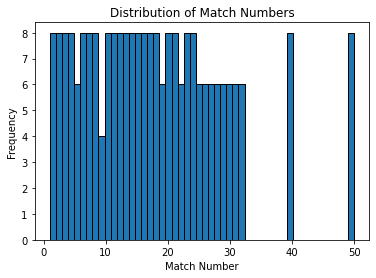

In [913]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the dataframe
df_copy = result_df.copy()
df_copy['match_number'] = pd.to_numeric(df_copy['match_number'], errors='coerce')

match_numbers = df_copy['match_number'].dropna()

plt.hist(match_numbers, bins=max(match_numbers.astype(int)), edgecolor='black')
plt.title('Distribution of Match Numbers')
plt.xlabel('Match Number')
plt.ylabel('Frequency')
plt.show()

In [914]:
def check_match_number_distribution(df, season, gender):
    # Filter dataframe by gender and season and reset index
    df_gender_season = df[(df['gender'] == gender) & (df['season'] == int(season))].reset_index(drop=True)
    
    # Exclude rows where match_number is 'Unknown' or non-numeric
    matches_with_number = df_gender_season[pd.to_numeric(df_gender_season['match_number'], errors='coerce').notna()]
    
    # Convert the match_number column to integers
    matches_with_number['match_number'] = matches_with_number['match_number'].astype(int)
    
    # Check the minimum, maximum and the distribution of match numbers
    min_match_number = matches_with_number['match_number'].min()
    max_match_number = matches_with_number['match_number'].max()
    distribution = matches_with_number['match_number'].value_counts().sort_index()

    print(f'In {season} season for {gender}:')
    print(f'Minimum match number: {min_match_number}')
    print(f'Maximum match number: {max_match_number}')
    print('Distribution of match numbers:')
    print(distribution)
    print('--------------------')

# Check the match number distribution for 2021 and 2022 for both genders
check_match_number_distribution(result_df, '2021', 'male')
check_match_number_distribution(result_df, '2021', 'female')
check_match_number_distribution(result_df, '2022', 'male')
check_match_number_distribution(result_df, '2022', 'female')

In 2021 season for male:
Minimum match number: 1
Maximum match number: 50
Distribution of match numbers:
1     2
2     2
3     2
4     2
6     2
7     2
8     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
40    2
50    2
Name: match_number, dtype: int64
--------------------
In 2021 season for female:
Minimum match number: 1
Maximum match number: 50
Distribution of match numbers:
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
40    2
50    2
Name: match_number, dtype: int64
--------------------
In 2022 season for male:
Minimum match number: 1
Maximum match number: 50
Distribution of match numbers:
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2

In [915]:
# Create separate dataframes for each season
df_2021 = result_df.loc[result_df['season'] == 2021] #128rows 64 matches 

df_2022 = result_df.loc[result_df['season'] == 2022] #120rows 60 matches 

# Further split these dataframes by gender
df_2021_men = df_2021.loc[df_2021['gender'] == 'male'] #64rows 32 matches 
df_2021_women = df_2021.loc[df_2021['gender'] == 'female'] #64rows 32 matches 

df_2022_men = df_2022.loc[df_2022['gender'] == 'male'] #68rows 34 matches
df_2022_women = df_2022.loc[df_2022['gender'] == 'female'] #52rows 26 matches

In [916]:
df_2022_women

#The following sides did not play each other in the group stage, 
#due to the shortened women's competition: 
#Oval Invincibles and Welsh Fire, 
#Northern Superchargers and Trent Rockets, 
#London Spirit and Manchester Originals, 
#Southern Brave and Birmingham Phoenix.

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
146,win,Oval Invincibles,Northern Superchargers,female,2022,8,11,1,"Kennington Oval, London",London,Oval Invincibles,field,Oval Invincibles
147,loose,Northern Superchargers,Oval Invincibles,female,2022,8,11,1,"Kennington Oval, London",London,Oval Invincibles,field,Oval Invincibles
150,win,Southern Brave,London Spirit,female,2022,8,12,2,"The Rose Bowl, Southampton",Southampton,London Spirit,bat,Southern Brave
151,loose,London Spirit,Southern Brave,female,2022,8,12,2,"The Rose Bowl, Southampton",Southampton,London Spirit,bat,Southern Brave
154,win,Trent Rockets,Manchester Originals,female,2022,8,13,3,"Old Trafford, Manchester",Manchester,Manchester Originals,field,Trent Rockets
155,loose,Manchester Originals,Trent Rockets,female,2022,8,13,3,"Old Trafford, Manchester",Manchester,Manchester Originals,field,Trent Rockets
158,win,Birmingham Phoenix,Welsh Fire,female,2022,8,13,4,"Sophia Gardens, Cardiff",Cardiff,Welsh Fire,field,Birmingham Phoenix
159,loose,Welsh Fire,Birmingham Phoenix,female,2022,8,13,4,"Sophia Gardens, Cardiff",Cardiff,Welsh Fire,field,Birmingham Phoenix
160,win,Southern Brave,Oval Invincibles,female,2022,8,14,6,"Kennington Oval, London",London,Oval Invincibles,field,Southern Brave
161,loose,Oval Invincibles,Southern Brave,female,2022,8,14,6,"Kennington Oval, London",London,Oval Invincibles,field,Southern Brave


The women's competition was curtailed due to the inclusion of women's cricket at the 2022 Commonwealth Games in Birmingham, reducing the number of players who were available for the start of the contest. As a result, the women's contest started a week later and each women's team only played six matches in the group stage, meaning some sides did not meet each other at that point in the competition

## Step4: Exploratory data analysis + Feature engineering

In [917]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 247
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Result         246 non-null    object
 1   team           246 non-null    object
 2   Opponent       246 non-null    object
 3   gender         246 non-null    object
 4   season         246 non-null    int64 
 5   month          246 non-null    int64 
 6   day            246 non-null    int64 
 7   match_number   246 non-null    object
 8   venue          246 non-null    object
 9   city           246 non-null    object
 10  toss_winner    246 non-null    object
 11  toss_decision  246 non-null    object
 12  winner         246 non-null    object
dtypes: int64(3), object(10)
memory usage: 26.9+ KB


In [918]:
result_df.describe(include='all')

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
count,246,246,246,246,246.000000,246.000000,246.000000,246,246,246,246,246,246
unique,2,8,8,2,NaN,NaN,NaN,34,8,7,8,2,8
top,win,Southern Brave,Southern Brave,male,NaN,NaN,NaN,1,"Lord's, London",London,Southern Brave,field,Southern Brave
freq,123,34,34,130,NaN,NaN,NaN,8,36,68,40,178,46
mean,NaN,NaN,NaN,NaN,2021.487805,7.845528,16.918699,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.500870,0.443226,9.045548,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2021.000000,7.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2021.000000,8.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2021.000000,8.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2022.000000,8.000000,24.750000,NaN,NaN,NaN,NaN,NaN,NaN


In [919]:
#checking the missing value
result_df.isnull().sum()

Result           0
team             0
Opponent         0
gender           0
season           0
month            0
day              0
match_number     0
venue            0
city             0
toss_winner      0
toss_decision    0
winner           0
dtype: int64

In [920]:
result_df['winner'].value_counts() #8

Southern Brave            46
Oval Invincibles          40
Birmingham Phoenix        36
Trent Rockets             36
Northern Superchargers    26
Manchester Originals      26
London Spirit             24
Welsh Fire                12
Name: winner, dtype: int64

In [921]:
result_df['city'].value_counts() #7 city

London         68
Southampton    34
Birmingham     30
Leeds          30
Nottingham     30
Cardiff        30
Manchester     24
Name: city, dtype: int64

In [922]:
result_df['venue'].value_counts()  #8 venue, because london has two venue

Lord's, London                36
The Rose Bowl, Southampton    34
Kennington Oval, London       32
Edgbaston, Birmingham         30
Headingley, Leeds             30
Trent Bridge, Nottingham      30
Sophia Gardens, Cardiff       30
Old Trafford, Manchester      24
Name: venue, dtype: int64

In [923]:
columns_to_check = ['Result',
                    'team', 'Opponent', 
                    'gender', 'season', 'match_number',
                    'venue', 'city', 
                    'toss_winner', 'toss_decision', 
                    'winner']

for col in columns_to_check:
    print(f"\nDistribution for column: {col}")
    print(result_df[col].value_counts())



Distribution for column: Result
win      123
loose    123
Name: Result, dtype: int64

Distribution for column: team
Southern Brave            34
Birmingham Phoenix        32
Trent Rockets             32
Oval Invincibles          31
London Spirit             30
Welsh Fire                30
Manchester Originals      29
Northern Superchargers    28
Name: team, dtype: int64

Distribution for column: Opponent
Southern Brave            34
Birmingham Phoenix        32
Trent Rockets             32
Oval Invincibles          31
London Spirit             30
Welsh Fire                30
Manchester Originals      29
Northern Superchargers    28
Name: Opponent, dtype: int64

Distribution for column: gender
male      130
female    116
Name: gender, dtype: int64

Distribution for column: season
2021    126
2022    120
Name: season, dtype: int64

Distribution for column: match_number
1     8
15    8
24    8
23    8
40    8
21    8
20    8
2     8
18    8
17    8
16    8
14    8
13    8
12    8
11    8

### Step 4.1: For variables with only two values, visualise the distribution and code the transformation：binary encoding? Label encoding? One hot encoding?

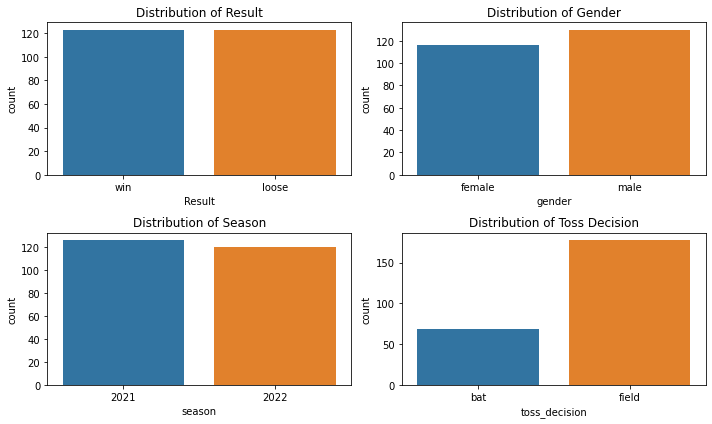

In [924]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

sns.countplot(x='Result', data=result_df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Result')

sns.countplot(x='gender', data=result_df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

sns.countplot(x='season', data=result_df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Season')

sns.countplot(x='toss_decision', data=result_df, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Toss Decision')

plt.tight_layout()
plt.show()

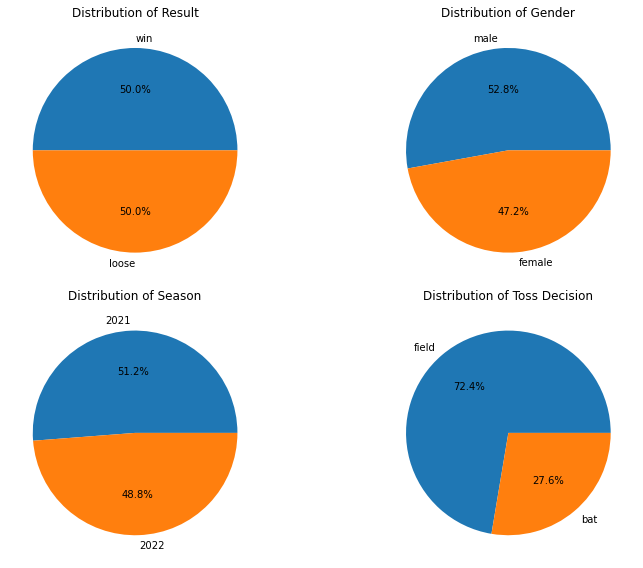

In [925]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of Axes objects

# Plot 'Result' distribution
result_counts = result_df['Result'].value_counts()
ax[0, 0].pie(result_counts, labels = result_counts.index, autopct='%1.1f%%')
ax[0, 0].set_title('Distribution of Result')

# Plot 'gender' distribution
gender_counts = result_df['gender'].value_counts()
ax[0, 1].pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%')
ax[0, 1].set_title('Distribution of Gender')

# Plot 'season' distribution
season_counts = result_df['season'].value_counts()
ax[1, 0].pie(season_counts, labels = season_counts.index, autopct='%1.1f%%')
ax[1, 0].set_title('Distribution of Season')

# Plot 'toss_decision' distribution
toss_decision_counts = result_df['toss_decision'].value_counts()
ax[1, 1].pie(toss_decision_counts, labels = toss_decision_counts.index, autopct='%1.1f%%')
ax[1, 1].set_title('Distribution of Toss Decision')

# Adjust the layout
plt.tight_layout()
plt.show()

#### Slightly more men's races than women's, with more races in 2021 than in 2022
#### 56 races in 2022 (32 men's races, 24 women's races)
#### 64 races in 2021 (32 men's, 32 women's)
#### 72% of toss decisions chose field over bat

#### Half win/lose (excluding the one match with no result, indicating that this is a very balanced data set), 
#### so we can change it into binary variable (win map to 1, loose map to 0)

In [926]:
print(result_df['Result'].unique())

['win' 'loose']


In [927]:
result_df['Result'] = result_df['Result'].map({'win': 1, 'loose': 0})

In [928]:
#after Binary Encoder, checki that
result_df['Result'].value_counts()

1    123
0    123
Name: Result, dtype: int64

#### Similarly, toss decision and gender are also unordered binary categorical variables, and a binary transformation (0-1) is sufficient

In [929]:
result_df['gender'] = result_df['gender'].map({'male': 1, 'female': 0})
result_df['toss_decision'] = result_df['toss_decision'].map({'field': 1, 'bat': 0})

In [930]:
#after Binary Encoder, checki that
result_df['gender'].value_counts()

1    130
0    116
Name: gender, dtype: int64

In [931]:
#after Binary Encoder, checki that
result_df['toss_decision'].value_counts()

1    178
0     68
Name: toss_decision, dtype: int64

#### For categorical variables with more than two categories that are ordered between categories, such as SEASON (which may have a chronological order, with 2021 being earlier than 2022), binary variable (0-1)can be used.

In [932]:
result_df['season'] = result_df['season'] - 2021

In [933]:
result_df['season'].value_counts()

0    126
1    120
Name: season, dtype: int64

### win:1, loose:0, male:1, female:0, field:1, bat:0,  2022:1, 2021:0

In [934]:
#After converting the results to 1-0, each team's winning percentage can be calculated
match_counts = result_df['team'].value_counts()
win_counts = result_df[result_df['Result'] == 1]['team'].value_counts()
win_rate = win_counts / match_counts
print(win_rate)

Birmingham Phoenix        0.562500
London Spirit             0.400000
Manchester Originals      0.448276
Northern Superchargers    0.464286
Oval Invincibles          0.645161
Southern Brave            0.676471
Trent Rockets             0.562500
Welsh Fire                0.200000
Name: team, dtype: float64


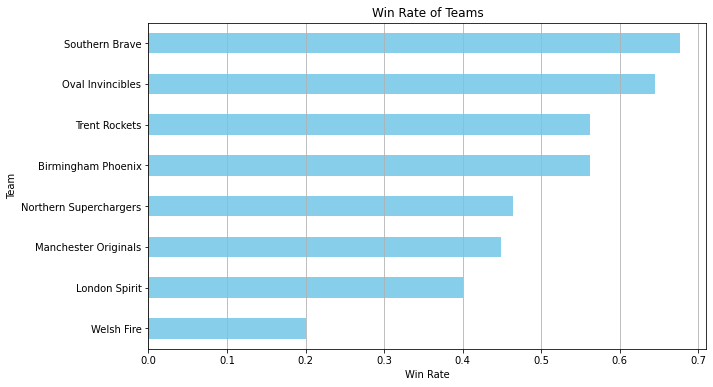

In [935]:
win_rate.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.xlabel('Win Rate')
plt.ylabel('Team')
plt.title('Win Rate of Teams')
plt.grid(axis='x')

plt.show()

### Step 4.2: Observe the distribution of multicategorical variables (more than two groups) and perform code-switching

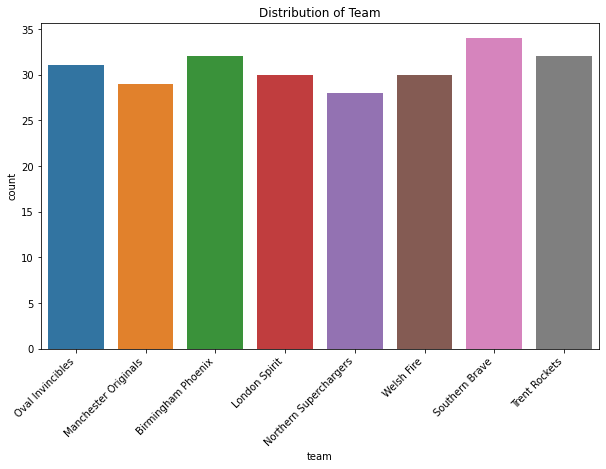

In [937]:
plt.figure(figsize=(10,6))
chart = sns.countplot(x='team', data=result_df)
plt.title('Distribution of Team')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#The 'teams' and 'Opponent' distributions of team and com are the same, so I won't draw them

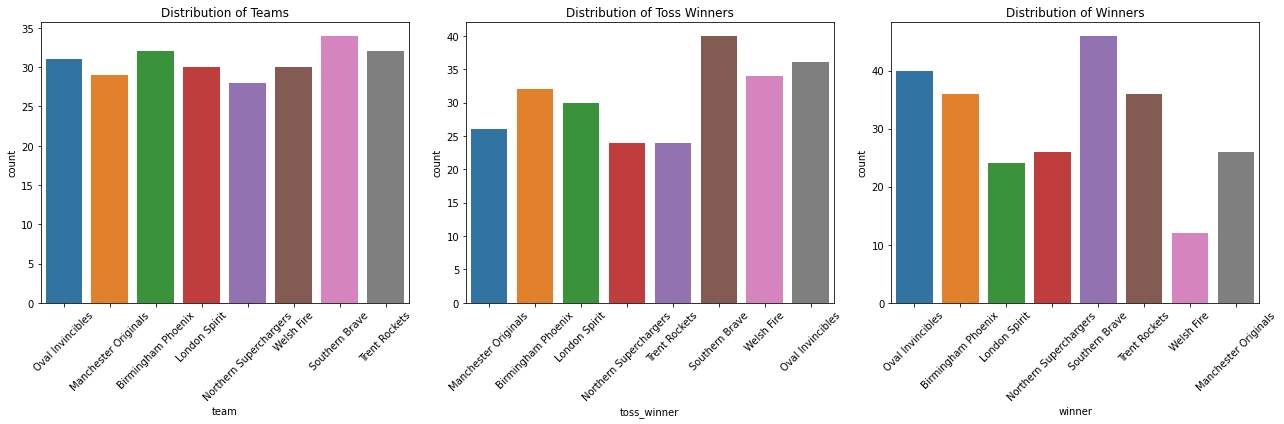

In [945]:
# Plot for 'team', 'toss_winner' and 'winner'
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Create a 1x3 grid of Axes objects

sns.countplot(x='team', data=result_df, ax=ax[0])
ax[0].set_title('Distribution of Teams')
ax[0].tick_params(axis='x', rotation=45)  # Rotate X-axis labels for better readability

sns.countplot(x='toss_winner', data=result_df, ax=ax[1])
ax[1].set_title('Distribution of Toss Winners')
ax[1].tick_params(axis='x', rotation=45) 

sns.countplot(x='winner', data=result_df, ax=ax[2])
ax[2].set_title('Distribution of Winners')
ax[2].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

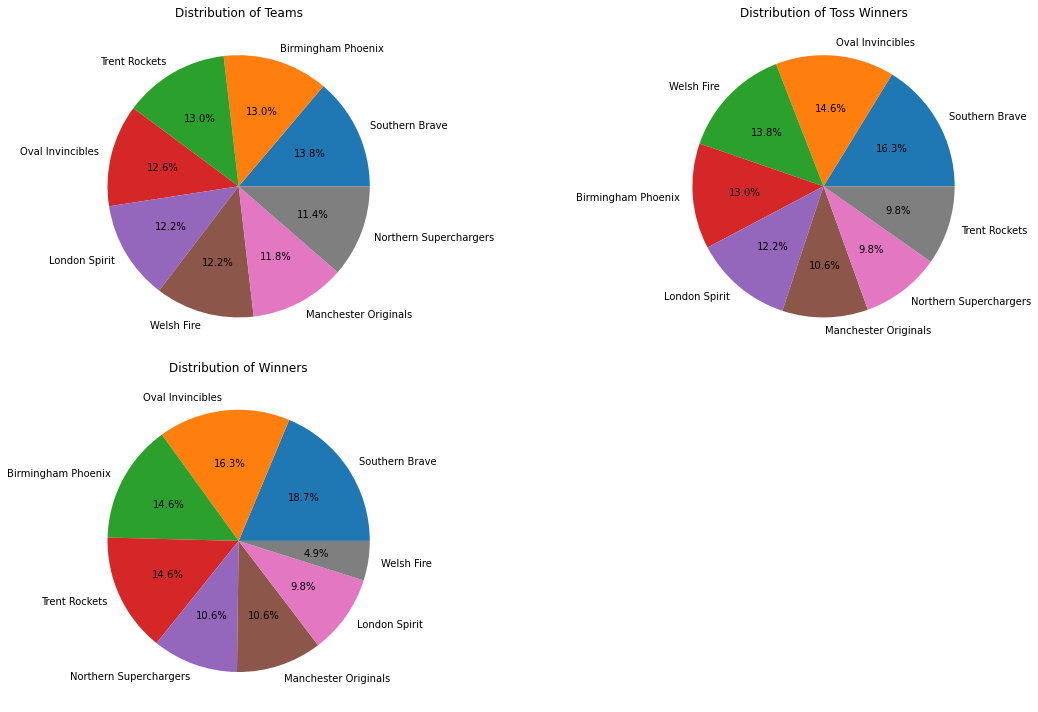

In [946]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

# For 'team' column
team_counts = result_df['team'].value_counts()
ax[0,0].pie(team_counts, labels=team_counts.index, autopct='%1.1f%%')
ax[0,0].set_title('Distribution of Teams')

# For 'toss_winner' column
toss_winner_counts = result_df['toss_winner'].value_counts()
ax[0,1].pie(toss_winner_counts, labels=toss_winner_counts.index, autopct='%1.1f%%')
ax[0,1].set_title('Distribution of Toss Winners')

# For 'winner' column
winner_counts = result_df['winner'].value_counts()
ax[1,0].pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%')
ax[1,0].set_title('Distribution of Winners')

fig.delaxes(ax[1,1])
plt.tight_layout()
plt.show()

#### The team with the most wins was Southern Brave (18.7%), the team with the most entries (13.8%) and the most toss winners (16.3%)

#### The team that won the least was Welsh Fire (4.9%), which played the second lowest team rate (11.4%) and did have the second highest probability of winning the toss winner (13.8%), so it can be guessed: whenever this team played, it got the toss winner more often than not, but lost the whole game often

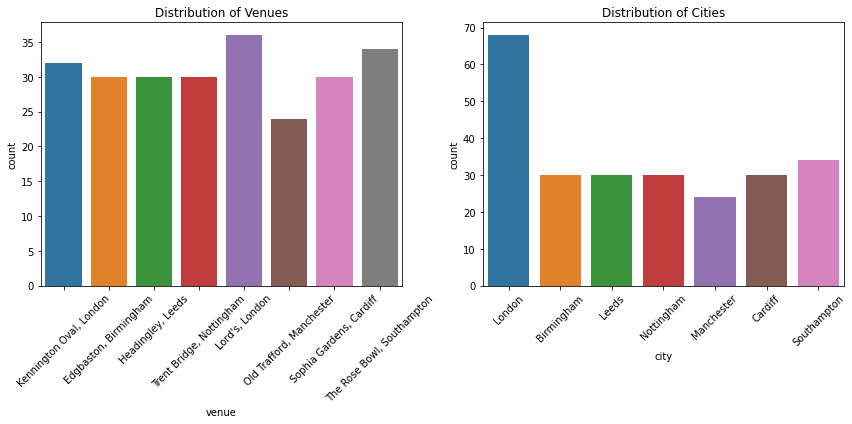

In [947]:
# Plot for 'venue' and 'city'
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid of Axes objects

sns.countplot(x='venue', data=result_df, ax=ax[0])
ax[0].set_title('Distribution of Venues')
ax[0].tick_params(axis='x', rotation=45) 

sns.countplot(x='city', data=result_df, ax=ax[1])
ax[1].set_title('Distribution of Cities')
ax[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

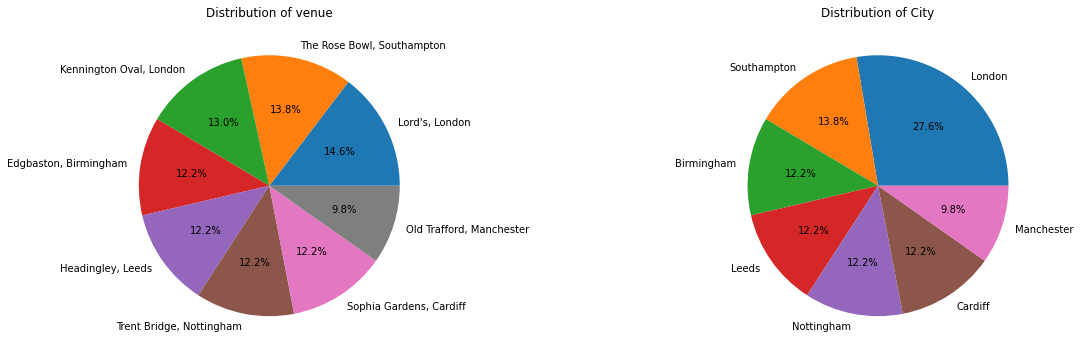

In [948]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# For 'venue' column
venue_counts = result_df['venue'].value_counts()
ax[0].pie(venue_counts, labels=venue_counts.index, autopct='%1.1f%%')
ax[0].set_title('Distribution of venue')


# For 'city' column
city_counts = result_df['city'].value_counts()
ax[1].pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
ax[1].set_title('Distribution of City')

plt.show()

#### The city that has hosted the most matches is London and the least is Manchester;
#### The venue that hosted the most matches was 'Lord's, London' and the least was 'Old Trafford, Manchester '

In [950]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Transform each category feature with label encoding
for col in ['venue', 'city', 'team', 'Opponent', 'toss_winner', 'winner']:
    result_df[col] = label_encoder.fit_transform(result_df[col])

#### For categorical variables with more than two categories, but no order between them, such as TEAM and CITY, label encoding can be used. This encoding will assign a unique integer value to each category.

In [953]:
result_df.head()

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
0,1,4,2,0,0,7,21,1,2,3,2,0,4
1,0,2,4,0,0,7,21,1,2,3,2,0,4
2,1,4,2,1,0,7,22,1,2,3,2,1,4
3,0,2,4,1,0,7,22,1,2,3,2,1,4
4,1,0,1,1,0,7,23,2,0,0,0,1,0


### Step 4.3: There is only one numeric variable: match number

In [954]:
print(result_df['match_number'].dtypes)

object


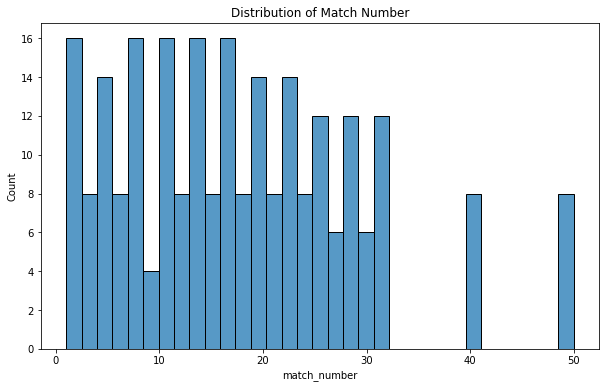

In [956]:
#Convert to numeric variables first
result_df['match_number'] = pd.to_numeric(result_df['match_number'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(data=result_df, x="match_number", bins=33)
plt.title('Distribution of Match Number')
plt.show()

In [966]:
#Now fully encoded and converted to numeric
result_df.describe()

,Result,team,Opponent,gender,season,month,day,match_number,venue,city,toss_winner,toss_decision,winner
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.500000,3.528455,3.528455,0.528455,0.487805,7.845528,16.918699,17.723577,3.504065,3.024390,3.577236,0.723577,3.430894
std,0.501019,2.306425,2.306425,0.500207,0.500870,0.443226,9.045548,11.410916,2.294177,1.884257,2.310608,0.448140,2.157403
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.250000,1.250000,0.000000,0.000000,8.000000,10.000000,8.250000,2.000000,2.000000,1.250000,0.000000,2.000000
50%,0.500000,4.000000,4.000000,1.000000,0.000000,8.000000,17.000000,17.000000,3.000000,3.000000,4.000000,1.000000,4.000000
75%,1.000000,5.750000,5.750000,1.000000,1.000000,8.000000,24.750000,25.000000,6.000000,5.000000,5.000000,1.000000,5.000000
max,1.000000,7.000000,7.000000,1.000000,1.000000,9.000000,31.000000,50.000000,7.000000,6.000000,7.000000,1.000000,7.000000


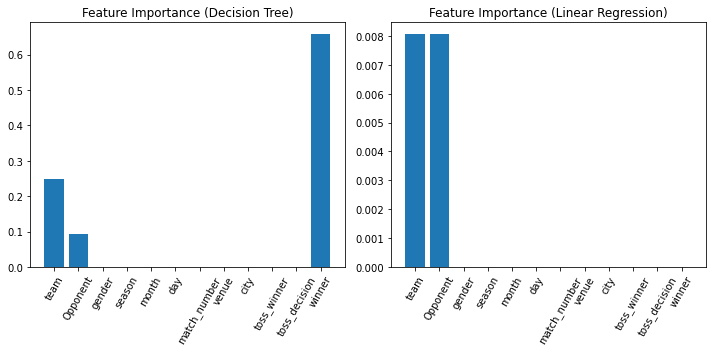

In [977]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Prepare the dataset
X = result_df.drop('Result', axis=1)
y = result_df['Result']

# Decision Tree Model
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Compute the feature importances
tree_importances = tree_model.feature_importances_
linear_importances = abs(linear_model.coef_)

# Draw the feature importance ranking
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(X.columns, tree_importances)
ax[0].set_title('Feature Importance (Decision Tree)')
ax[0].set_xticklabels(X.columns, rotation=60)
ax[1].bar(X.columns, linear_importances)
ax[1].set_title('Feature Importance (Linear Regression)')
ax[1].set_xticklabels(X.columns, rotation=60)
plt.tight_layout()
plt.show()

In [981]:
# Select the top 3 features
top_features = ['winner', 'team', 'Opponent']  

# Prepare the dataset
X_top = result_df[top_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred))

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))

SyntaxError: invalid syntax (2094442723.py, line 13)

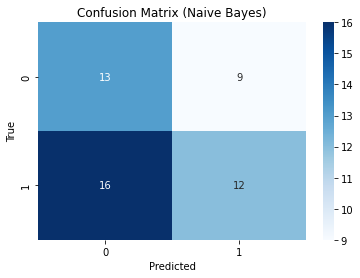

In [979]:
from sklearn.metrics import confusion_matrix

# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

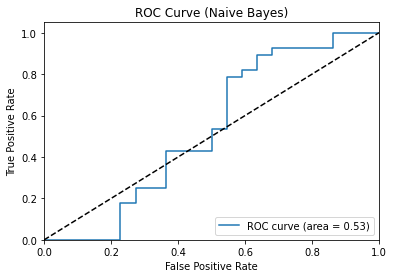

In [980]:
from sklearn.metrics import roc_curve, auc

# Compute the probabilities
y_pred_prob = gnb.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

### Additional feature engineering is required to adjust model parameters and improve model accuracy

Gaussian Naive Bayes Accuracy:  0.44

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.41      0.39        22
           1       0.50      0.46      0.48        28

    accuracy                           0.44        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.45      0.44      0.44        50

Feature Importances: [0.15703775 0.24085643 0.00097273 0.         0.         0.00363152
 0.0136182  0.         0.00113485 0.         0.         0.58274852]


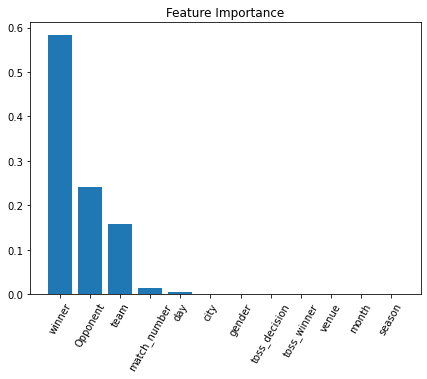

In [974]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report

# feature_names = ['team','Opponent','gender','season','month','day',	'match_number',
#                  'venue','city','toss_winner','toss_decision','winner']

# X = result_df[feature_names]
# y = result_df['Result']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Gaussian Naive Bayes classifier
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

# # Make predictions
# y_pred_gnb = gnb.predict(X_test)

# print("Gaussian Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_gnb))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

# # Train a Decision Tree classifier to evaluate feature importances
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# # Calculating feature importance
# importances = model.feature_importances_
# print("Feature Importances: {}".format(importances))

# # Ranking the importance of features
# indices = np.argsort(importances)[::-1]
# names = [feature_names[i] for i in indices]

# # Drawings
# plt.figure(figsize=(7,5))
# plt.title("Feature Importance")
# plt.bar(range(X.shape[1]), importances[indices])
# plt.xticks(range(X.shape[1]), names, rotation=60)
# plt.show()

## Another type of data frame: read from a json file instead of a csv file

In [983]:
import os
import json
import pandas as pd

directory = '/Users/quinne/Desktop/hnd_json/'
data = []

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data.append(json.load(file))

In [985]:
data[0]

{'meta': {'data_version': '1.1.0', 'created': '2022-09-05', 'revision': 1},
 'info': {'balls_per_over': 5,
  'city': 'London',
  'dates': ['2022-09-03'],
  'event': {'name': "The Hundred Men's Competition", 'stage': 'Final'},
  'gender': 'male',
  'match_type': 'T20',
  'officials': {'match_referees': ['Phil Whitticase'],
   'reserve_umpires': ['BJ Debenham'],
   'tv_umpires': ['NJ Llong'],
   'umpires': ['MJ Saggers', 'M Burns']},
  'outcome': {'winner': 'Trent Rockets', 'by': {'wickets': 2}},
  'overs': 20,
  'player_of_match': ['SJ Cook'],
  'players': {'Manchester Originals': ['PD Salt',
    'LJ Evans',
    'WL Madsen',
    'T Stubbs',
    'AJ Turner',
    'PI Walter',
    'TA Lammonby',
    'TW Hartley',
    'RJ Gleeson',
    'MW Parkinson',
    'J Little'],
   'Trent Rockets': ['AD Hales',
    'DJ Malan',
    'T Kohler-Cadmore',
    'SR Patel',
    'C Munro',
    'TJ Moores',
    'DR Sams',
    'L Gregory',
    'M Carter',
    'L Wood',
    'SJ Cook']},
  'registry': {'people': {

#### Note that the over score here is 40 separate numbers, representing a total of 40 over scores for the 2 teams

In [986]:
# Initialize empty lists for each feature
match_types = []
cities = []
venues = []
toss_winners = []
toss_decisions = []
winners = []
teams = []
dates = []
players_team1 = []
players_team2 = []
officials = []  
overs_scores = []


# Loop over each match
# Loop over each match
for match in data:
    info = match['info']
    
    # Append information to the respective lists
    match_types.append(info.get('match_type'))
    cities.append(info.get('city'))
    venues.append(info.get('venue'))
    toss_winners.append(info.get('toss', {}).get('winner'))
    toss_decisions.append(info.get('toss', {}).get('decision'))
    
    # If there is no 'winner' in 'outcome', fill it with 'No Winner'
    outcome = info.get('outcome', {})
    winners.append(outcome.get('winner', 'No Winner'))
    
    teams.append(info.get('teams'))
    dates.append(info.get('dates', [None])[0])  # Fill missing dates with None
    players_team1.append(info.get('players', {}).get(info.get('teams', [None, None])[0], []))  # Fill missing players with empty list
    players_team2.append(info.get('players', {}).get(info.get('teams', [None, None])[1], []))  # Fill missing players with empty list

    # Get officials
    officials.append(info.get('officials', {}))

    # Get the score for each over
    innings = match.get('innings', [])
    match_overs_scores = []
    for inning in innings:
        overs = inning.get('overs', [])
        for over in overs:
            deliveries = over.get('deliveries', [])
            over_score = sum(delivery.get('runs', {}).get('total', 0) for delivery in deliveries)
            match_overs_scores.append(over_score)
    overs_scores.append(match_overs_scores)


# Convert all the lists into a DataFrame
df = pd.DataFrame({
    'match_type': match_types,
    'city': cities,
    'venue': venues,
    'team1': [team[0] for team in teams],
    'team2': [team[1] for team in teams],
    'toss_winner': toss_winners,
    'toss_decision': toss_decisions,
    'winner': winners,
    'date': dates,
    'players_team1': players_team1,
    'players_team2': players_team2,
    'officials': officials,
    'overs_scores': overs_scores
})


# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df

,match_type,city,venue,team1,team2,toss_winner,toss_decision,winner,date,players_team1,players_team2,officials,overs_scores
0,T20,London,"Lord's, London",Manchester Originals,Trent Rockets,Manchester Originals,bat,Trent Rockets,2022-09-03,"[PD Salt, LJ Evans, WL Madsen, T Stubbs, AJ Tu...","[AD Hales, DJ Malan, T Kohler-Cadmore, SR Pate...","{'match_referees': ['Phil Whitticase'], 'reser...","[8, 5, 3, 4, 3, 3, 11, 12, 8, 3, 10, 9, 4, 5, ..."
1,T20,Southampton,"The Rose Bowl, Southampton",Trent Rockets,Southern Brave,Southern Brave,field,Southern Brave,2022-08-25,"[AD Hales, DJ Malan, T Kohler-Cadmore, SR Pate...","[PR Stirling, Q de Kock, JM Vince, AL Davies, ...","{'match_referees': ['Phil Whitticase'], 'reser...","[6, 9, 3, 3, 6, 3, 10, 4, 9, 6, 13, 8, 4, 7, 7..."
2,T20,Cardiff,"Sophia Gardens, Cardiff",Welsh Fire,Southern Brave,Southern Brave,field,Southern Brave,2021-07-27,"[BF Smith, HK Matthews, AJ Macleod, G Redmayne...","[S Mandhana, DN Wyatt, SIR Dunkley, SR Taylor,...","{'match_referees': ['TJ Boon'], 'reserve_umpir...","[1, 2, 6, 6, 11, 9, 6, 3, 6, 3, 5, 8, 2, 3, 3,..."
3,T20,Leeds,"Headingley, Leeds",Northern Superchargers,London Spirit,Northern Superchargers,bat,London Spirit,2022-08-14,"[F du Plessis, A Lyth, DJ Willey, HC Brook, MS...","[AM Rossington, DJ Bell-Drummond, GJ Maxwell, ...","{'match_referees': ['PM Such'], 'reserve_umpir...","[1, 1, 4, 11, 6, 4, 5, 7, 9, 10, 2, 4, 10, 9, ..."
4,T20,Cardiff,"Sophia Gardens, Cardiff",Manchester Originals,Welsh Fire,Welsh Fire,field,Welsh Fire,2021-07-31,"[L Lee, EL Lamb, GEB Boyce, H Kaur, M du Preez...","[BF Smith, HK Matthews, G Redmayne, SJ Taylor,...","{'match_referees': ['SJ Davis'], 'reserve_umpi...","[10, 2, 3, 4, 2, 1, 4, 10, 2, 5, 11, 6, 8, 8, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,T20,Leeds,"Headingley, Leeds",Northern Superchargers,Oval Invincibles,Oval Invincibles,field,Northern Superchargers,2021-07-31,"[L Winfield, JI Rodrigues, L Wolvaardt, AN Dav...","[GL Adams, A Capsey, SJ Bryce, FC Wilson, D va...","{'match_referees': ['TJ Boon'], 'reserve_umpir...","[3, 9, 9, 2, 2, 3, 4, 10, 4, 11, 8, 1, 7, 2, 3..."
120,T20,Nottingham,"Trent Bridge, Nottingham",Manchester Originals,Trent Rockets,Manchester Originals,bat,Trent Rockets,2021-08-15,"[PD Salt, JM Clarke, C Munro, CN Ackermann, TA...","[AD Hales, DJ Malan, SJ Mullaney, SR Patel, DJ...","{'match_referees': ['Phil Whitticase'], 'reser...","[5, 6, 9, 9, 14, 6, 7, 14, 2, 3, 0, 4, 8, 11, ..."
121,T20,Birmingham,"Edgbaston, Birmingham",Birmingham Phoenix,Northern Superchargers,Northern Superchargers,field,Birmingham Phoenix,2022-08-19,"[E Jones, SFM Devine, AE Jones, EA Perry, S Mo...","[AJ Healy, GH Lewis, L Wolvaardt, BAM Heath, H...","{'match_referees': ['PM Such'], 'reserve_umpir...","[5, 7, 6, 9, 12, 7, 6, 5, 10, 10, 7, 7, 13, 5,..."
122,T20,London,"Lord's, London",Northern Superchargers,London Spirit,Northern Superchargers,bat,Northern Superchargers,2021-08-03,"[CA Lynn, A Lyth, HC Brook, DJ Willey, DJ Vila...","[AM Rossington, JP Inglis, LM Reece, EJG Morga...","{'match_referees': ['Phil Whitticase'], 'reser...","[5, 10, 1, 8, 3, 6, 13, 13, 3, 7, 11, 9, 6, 4,..."


In [987]:
len(df.iloc[0,-1])

40

#### Calculate the total number of points scored by both teams in each game (sum of 20 over scores for each team)

In [988]:
# get a list of all json files in directory
directory = '/Users/quinne/Desktop/hnd_json/'
filenames = [f for f in os.listdir(directory) if f.endswith('.json')]

# list to store data
match_data = []

for filename in filenames:
    with open(os.path.join(directory, filename)) as f:
        data = json.load(f)
        
        match_info = data.get('info', {})
        match_innings = data.get('innings', [])
        
        team1, team2 = match_info.get('teams', ["", ""])
        team1_score = 0
        team2_score = 0

        for inning in match_innings:
            team = inning.get('team')
            overs = inning.get('overs', [])
            
            for over in overs:
                deliveries = over.get('deliveries', [])
                
                for delivery in deliveries:
                    runs = delivery.get('runs', {}).get('total', 0)
                    
                    if team == team1:
                        team1_score += runs
                    elif team == team2:
                        team2_score += runs
                    
        match_data.append([team1, team2, team1_score, team2_score])
    
df_match = pd.DataFrame(match_data, columns=['team1', 'team2', 'team1_score', 'team2_score'])

In [989]:
df_match

,team1,team2,team1_score,team2_score
0,Manchester Originals,Trent Rockets,120,121
1,Trent Rockets,Southern Brave,138,142
2,Welsh Fire,Southern Brave,110,112
3,Northern Superchargers,London Spirit,143,147
4,Manchester Originals,Welsh Fire,120,124
...,...,...,...,...
119,Northern Superchargers,Oval Invincibles,109,105
120,Manchester Originals,Trent Rockets,135,136
121,Birmingham Phoenix,Northern Superchargers,153,148
122,Northern Superchargers,London Spirit,155,92


In [990]:
directory = '/Users/quinne/Desktop/hnd_json/'
filenames = [f for f in os.listdir(directory) if f.endswith('.json')]

# lists to store data
match_types = []
cities = []
venues = []
toss_winners = []
toss_decisions = []
winners = []
teams1 = []
teams2 = []
dates = []
players_team1 = []
players_team2 = []
match_referees = []
reserve_umpires = []
tv_umpires = []
umpires = []
team1_scores = []
team2_scores = []

for filename in filenames:
    with open(os.path.join(directory, filename)) as f:
        data = json.load(f)
        
        match_info = data.get('info', {})
        match_innings = data.get('innings', [])
        
        team1, team2 = match_info.get('teams', ["", ""])
        teams1.append(team1)
        teams2.append(team2)
        
        match_types.append(match_info.get('match_type'))
        cities.append(match_info.get('city'))
        venues.append(match_info.get('venue'))
        toss_winners.append(match_info.get('toss', {}).get('winner'))
        toss_decisions.append(match_info.get('toss', {}).get('decision'))
        winners.append(match_info.get('outcome', {}).get('winner'))
        dates.append(match_info.get('dates', [None])[0])  # only first date is taken
        
        officials = match_info.get('officials', {})
        match_referees.append(officials.get('match_referees', [None])[0])  # only first official is taken
        reserve_umpires.append(officials.get('reserve_umpires', [None])[0])  # only first official is taken
        tv_umpires.append(officials.get('tv_umpires', [None])[0])  # only first official is taken
        umpires.append(officials.get('umpires', [None])[0])  # only first official is taken
        
        team1_score = 0
        team2_score = 0

        for inning in match_innings:
            team = inning.get('team')
            overs = inning.get('overs', [])
            
            for over in overs:
                deliveries = over.get('deliveries', [])
                
                for delivery in deliveries:
                    runs = delivery.get('runs', {}).get('total', 0)
                    
                    if team == team1:
                        team1_score += runs
                    elif team == team2:
                        team2_score += runs
                    
        team1_scores.append(team1_score)
        team2_scores.append(team2_score)
        
data = {
    'match_type': match_types,
    'city': cities,
    'venue': venues,
    'toss_winner': toss_winners,
    'toss_decision': toss_decisions,
    'winner': winners,
    'team1': teams1,
    'team2': teams2,
    'date': dates,
    'match_referee': match_referees,
    'reserve_umpire': reserve_umpires,
    'tv_umpire': tv_umpires,
    'umpire': umpires,
    'team1_score': team1_scores,
    'team2_score': team2_scores
}

df = pd.DataFrame(data)

In [992]:
df #Is the df above better, or is the df here better?

,match_type,city,venue,toss_winner,toss_decision,winner,team1,team2,date,match_referee,reserve_umpire,tv_umpire,umpire,team1_score,team2_score
0,T20,London,"Lord's, London",Manchester Originals,bat,Trent Rockets,Manchester Originals,Trent Rockets,2022-09-03,Phil Whitticase,BJ Debenham,NJ Llong,MJ Saggers,120,121
1,T20,Southampton,"The Rose Bowl, Southampton",Southern Brave,field,Southern Brave,Trent Rockets,Southern Brave,2022-08-25,Phil Whitticase,S McLelland,S Redfern,AG Wharf,138,142
2,T20,Cardiff,"Sophia Gardens, Cardiff",Southern Brave,field,Southern Brave,Welsh Fire,Southern Brave,2021-07-27,TJ Boon,J Ibbotson,NL Bainton,AG Wharf,110,112
3,T20,Leeds,"Headingley, Leeds",Northern Superchargers,bat,London Spirit,Northern Superchargers,London Spirit,2022-08-14,PM Such,N Pratt,SJ O'Shaughnessy,GD Lloyd,143,147
4,T20,Cardiff,"Sophia Gardens, Cardiff",Welsh Fire,field,Welsh Fire,Manchester Originals,Welsh Fire,2021-07-31,SJ Davis,L Nenova,PK Baldwin,NA Mallender,120,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,T20,Leeds,"Headingley, Leeds",Oval Invincibles,field,Northern Superchargers,Northern Superchargers,Oval Invincibles,2021-07-31,TJ Boon,Y Dolphin-Cooper,NJ Llong,AY Harris,109,105
120,T20,Nottingham,"Trent Bridge, Nottingham",Manchester Originals,bat,Trent Rockets,Manchester Originals,Trent Rockets,2021-08-15,Phil Whitticase,GD Lloyd,PK Baldwin,RJ Warren,135,136
121,T20,Birmingham,"Edgbaston, Birmingham",Northern Superchargers,field,Birmingham Phoenix,Birmingham Phoenix,Northern Superchargers,2022-08-19,PM Such,J Ibbotson,M Burns,AY Harris,153,148
122,T20,London,"Lord's, London",Northern Superchargers,bat,Northern Superchargers,Northern Superchargers,London Spirit,2021-08-03,Phil Whitticase,RJ Bailey,RT Robinson,NJ Llong,155,92
